# Rubric Chatbot

## Phase 1: Generate rubric keywords

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
!python -m spacy download en_core_web_lg 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 4.1 MB/s eta 0:00:00m eta 0:00:010:00:02
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [6]:
import spacy as sp
nlp = sp.load("en_core_web_lg")

In [7]:
DF = pd.read_csv("AutoReview.csv")
# text = ' '.join(DF['summary'].to_list())
textbook_DF = DF['summary'][25]

In [8]:
# def extract_noun_phrases(text):
#     doc = nlp(text)
#     noun_phrases = [chunk.text for chunk in doc.noun_chunks]
#     return noun_phrases

def extract_modifiers(text):
    doc = nlp(text)
    modifiers = []

    for token in doc:
        # 抽取形容词和副词
        # if token.pos_ in ["ADJ", "ADV", "NOUN"]:
        #     modifiers.append(token.text)
            
        # 如果你还想获取与形容词直接相关的副词（例如：“very good”中的“very”）
        if token.pos_ == "NOUN":
            for child in token.children:
                if child.pos_ == "ADJ":
                    modifiers.append(child.text)
        # Create a list of words to be used in the word cloud
        # Here we're excluding stopwords and punctuations
    return modifiers

# noun_L = []
rubric_terms = []
for sentence in DF['summary'] :
    # for i in extract_noun_phrases(sentence) :
    #     noun_L.append(i)
    res = extract_modifiers(sentence)
    for i in res :
        rubric_terms.append(i)

# noun_L = list(set(noun_L))
rubric_terms = list(set(rubric_terms))

# print(noun_L[:10])
print(rubric_terms[:50])

['relevant', 'appropriate', 'short', 'various', 'assignment_participant', 'available', 'visual', 'large', 'old', 'bottom', 'redundant', 'potential', 'huge', 'bad', 'automized', 'next', 'Separate', 'different', 'Only', 'ascii', 'easy', 'magic', 'delayed', 'American', 'bigger', 'terse', 'parallel', 'third', 'alternative', 'Excellent', 'big', 'onymous', 'direct', 'tof', 'Sufficient', 'particular', 'specified', 'many', 'detailed', 'grammatical', 'modified', 'New', 'Known', 'coherent', 'Delete', 'previous', 'uneven', 'expertiza', 'biggest', 'Relevant']


In [9]:
textbook_DF

"The test plan is outstanding. very detailed and logically structured. It could be improved by comparing the #of active records with #of lines in the CSV. or if all student participants in the CSV, etc. It's a shame that the design desc has too many code snippet, copied pasted from the source code, which I could have checked directly in GitHub. I would expect a more high level pseudocode / UML diagram for the documentation. "

In [10]:
doc = nlp(textbook_DF)

def extract_modifiers(text):
    doc = nlp(text)
    modifiers = []

    for token in doc:
        # 抽取形容词和副词
        # if token.pos_ in ["ADJ", "ADV", "NOUN"]:
        #     modifiers.append(token.text)
            
        # 如果你还想获取与形容词直接相关的副词（例如：“very good”中的“very”）
        if token.pos_ == "NOUN":
            for child in token.children:
                if child.pos_ == "ADJ":
                    modifiers.append(child.text + ' ' + token.text)
        # Create a list of words to be used in the word cloud
        # Here we're excluding stopwords and punctuations
    return modifiers

res = extract_modifiers(textbook_DF)
res

['active records', 'many snippet', 'high level']

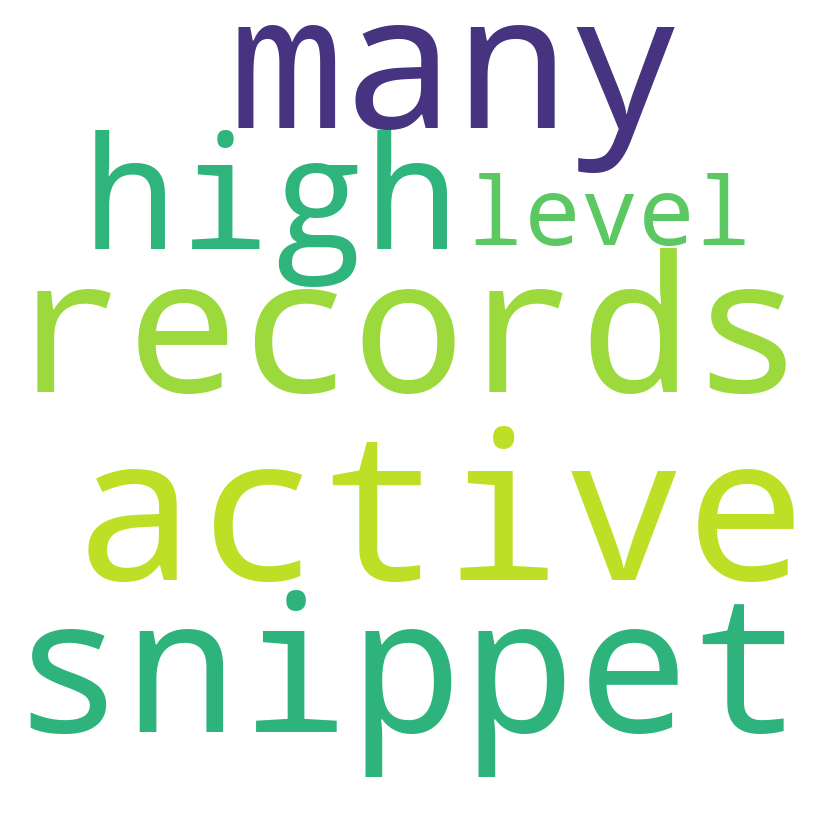

In [11]:

# Generate word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(),
                min_font_size = 10).generate(' '.join(res))

# Plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

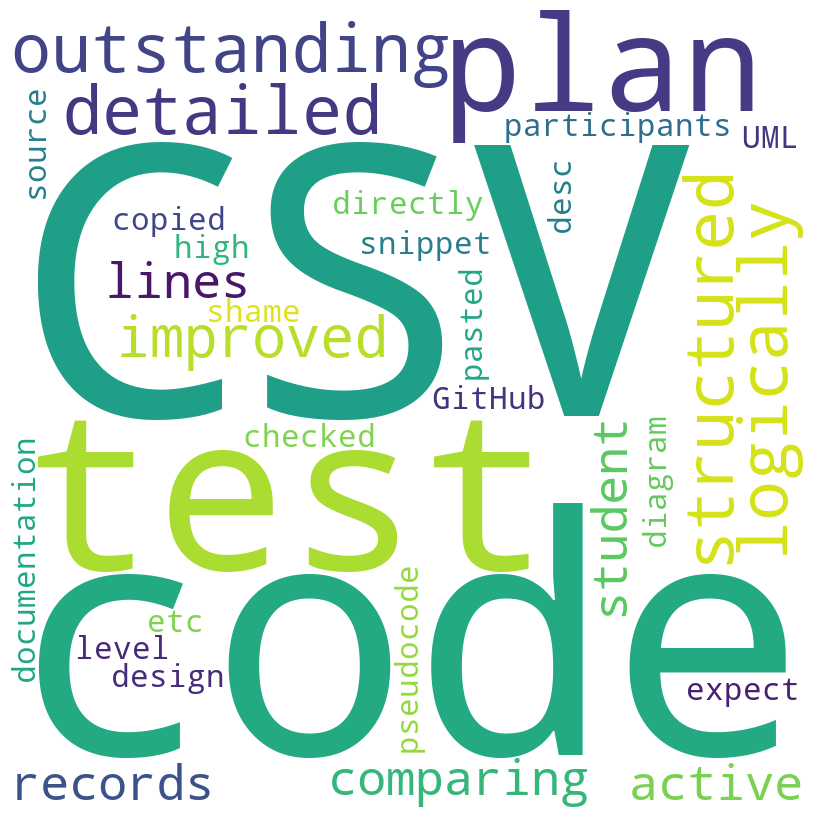

In [12]:
doc = nlp(textbook_DF)

# Create a list of words to be used in the word cloud
# Exclude stopwords and punctuations
words = [token.text for token in doc if not token.is_stop and not token.is_punct]

# Generate word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(),
                min_font_size = 10).generate(' '.join(words))

# Plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [13]:
rubric_terms = res

In [42]:
res

['active records', 'many snippet', 'high level']

## Phase 2: Interactively confirm the generated keywords

In [20]:
import ipywidgets as widgets

data = rubric_terms[:10]
checkboxes = [widgets.Checkbox(value=False, description=label) for label in data]
widgets.VBox(children=checkboxes)

In [21]:
selected_data = []
for i in range(0, len(checkboxes)):
    if checkboxes[i].value == True:
        selected_data = selected_data + [checkboxes[i].description]
print(selected_data)

[]


## Phase 3: Expand the set of keywords to the rubric items via LLM

In [72]:
selected_data = {"description":25, "change":20, "method":20, "readable":25, "pushed changes to github":10}

In [73]:
import openai
import json

In [74]:
openai.api_key = "hiden"

In [75]:
def send_to_gpt(rubric_terms) :
  response = openai.chat.completions.create(
    model="gpt-4",
    messages=[
      {
        "role": "system",
        "content": "Your task is to generate a rubric from the given keywords and related points. Please generate the rubric formatted as this format: | Term | Points | Description |"
      },
      {
        "role": "user",
        "content": "This is the keywords and points in a python dictionary you need to generate a rubric:" + rubric_terms 
      }
    ],
    temperature=1,
    max_tokens=768,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0
  )
  return response

In [76]:
response = send_to_gpt(rubric_terms=json.dumps(selected_data))

In [77]:
print(response.choices[0].message.content)
# print(completion.choices[0].message.content)

| Term | Points | Description |
|---|---|---|
| Description | 25 | The clarity and the level of detail in the overview, outlining the purpose and functionalities of the code. |
| Change | 20 | Degree to which the code has been modified to add new features, fix bugs, or improve efficiency. |
| Method | 20 | The implementation and explanation of the method used in the code, including adherence to best practices. |
| Readable | 25 | Legibility of the code, includes effective comments, appropriate naming of variables, and overall clean code practices. |
| Pushed Changes to Github | 10 | Timeliness and correctness of the updates pushed to Github, includes clear and concise commit messages. |


In [ ]:
# Cover something substantive 
# TO give weights for different sources: assignment_desc x 0.5 + ...
# CSC 517 Proj2 rubrics, we have the real rubrics.
# peer rubric vs the traditional rubric.


afs to ncsu drive -> add courses before 517 in the url to get

# Playground

In [44]:
import nltk
from nltk import FreqDist
nltk.download('stopwords') # run this one time


import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[nltk_data] Downloading package stopwords to /home/hdu5/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
DF = pd.read_csv("AutoReview.csv")

In [46]:
DF.head()

,pid,document,summary
0,E2011,This page provides a description of the Expertiza based OSS project. <link> is an open source project based on <link> framework. Expertiza allows the instructor to create new assignments and custo...,The wiki was to the point and explains all the code changes they have made. Why they touched some parts of code and why they didn't touch the others. Their test plan mentions a list of all the tes...
1,E1682,Expertiza is an open source project for school assignment management for instructors and students based on the Ruby on Rails framework. Expertiza allows the instructor to create new assignments an...,"The doc could be significantly improved by providing code examples of how to use the SSO service on each use case. e.g., what did you change on the rainbow service to use the SSO?"
2,E1628,The main goal of the project is to present the data in more convenient way and also improve the existing visualization present in expertiza. We plan to improve /grades/view_my_scores and grades/vi...,"The score should be x out of y, or ""x/y""."
3,E1758,"Expertiza is a web application developed using Ruby on Rails that serves as a peer-review system. The application allows students to submit and peer-review learning objects (articles, code, web si...","Design doc is quite readable. Would have helped if there was a subheading for each change. Other than that, it seems fine."
4,E2016,"In the first round of the Expertiza reviews, reviewers are asked to give authors some guidance on how to improve their work. Then in the second round, reviewers rate how well authors have followed...","The document describes the project well in narrative fashion. It seems to suggest that revisions can be solicited after any round, not just after Round 1. I don't think that's consistent with th..."


In [47]:
# function to plot most frequent terms
def freq_words(x, terms = 20):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

 # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

/home/hdu5/anaconda3/envs/RubricChatbot/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hdu5/anaconda3/envs/RubricChatbot/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hdu5/anaconda3/envs/RubricChatbot/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


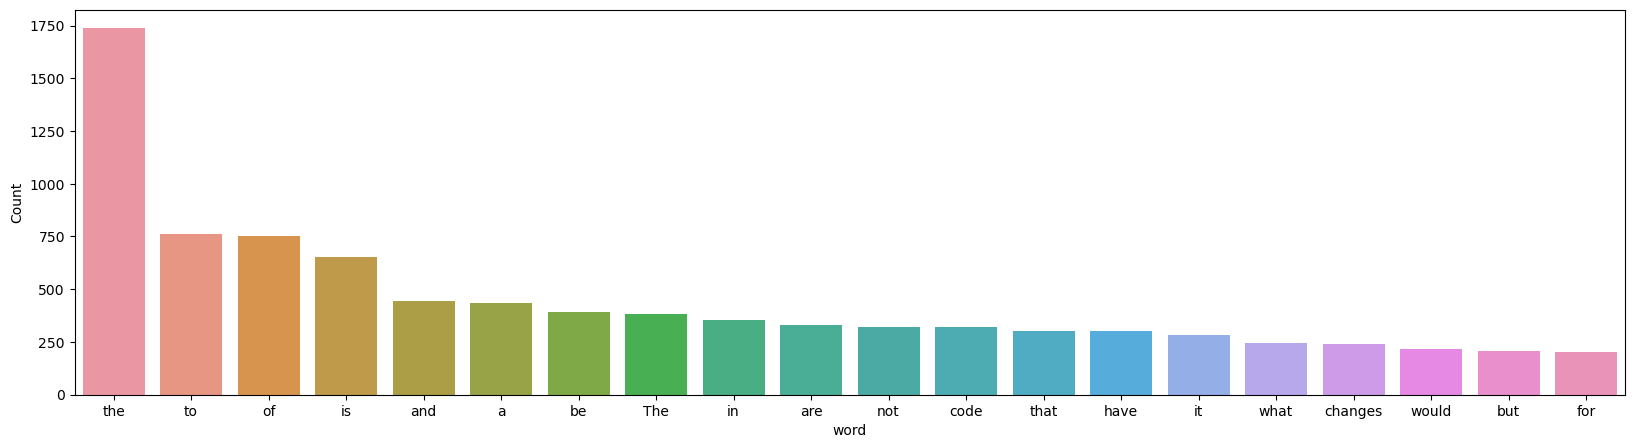

In [48]:
freq_words(DF['summary']) 

In [49]:
# remove unwanted characters, numbers and symbols
DF['summary'] = DF['summary'].str.replace("[^a-zA-Z#]", " ")

In [50]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
DF['summary'] = DF['summary'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>4]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in DF['summary']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

/home/hdu5/anaconda3/envs/RubricChatbot/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hdu5/anaconda3/envs/RubricChatbot/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hdu5/anaconda3/envs/RubricChatbot/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


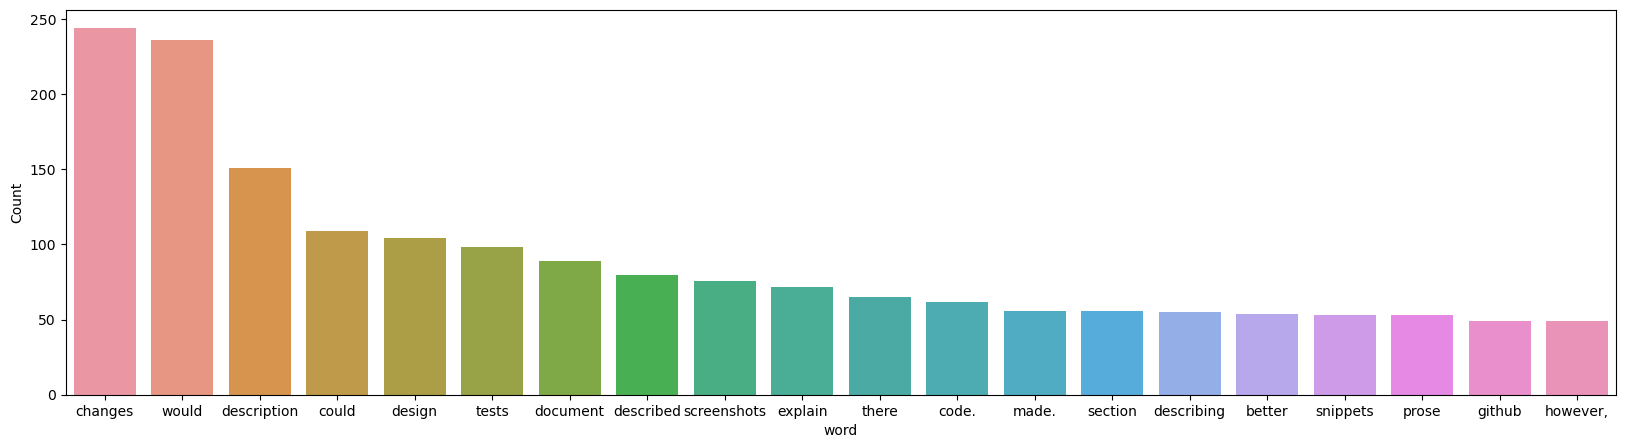

In [51]:
freq_words(reviews, 20) 

In [52]:
nlp = spacy.load('en_core_web_lg', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

In [53]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['could', 'significantly', 'improved', 'providing', 'examples', 'service', 'case.', 'e.g.,', 'change', 'rainbow', 'service']


In [54]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[0]) # print lemmatized review

['point', 'change', 'part', 'other', 'mention', 'case', 'dozen', 'item', 'logical', 'reviewer', 'cover']


/home/hdu5/anaconda3/envs/RubricChatbot/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hdu5/anaconda3/envs/RubricChatbot/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hdu5/anaconda3/envs/RubricChatbot/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


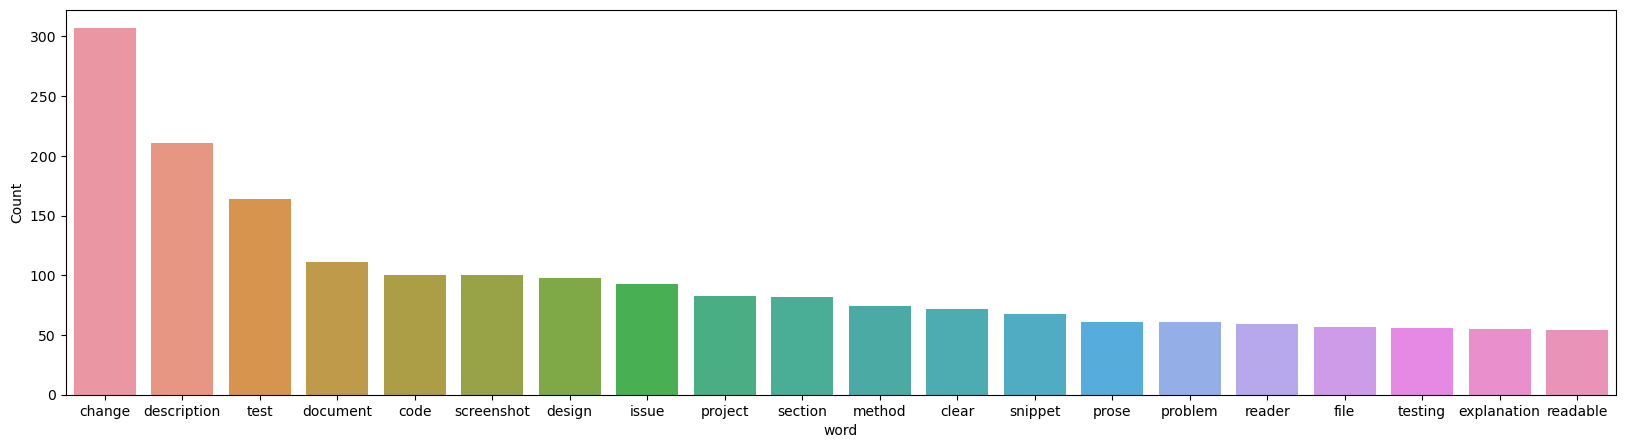

In [55]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

DF['summary'] = reviews_3

freq_words(DF['summary'], 20) 

In [56]:
dictionary = corpora.Dictionary(reviews_2) 
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=10, 
                random_state=100,
                chunksize=1000,
                passes=50)

In [57]:
lda_model.print_topics() 

[(0,
  '0.079*"test" + 0.075*"change" + 0.035*"description" + 0.030*"snippet" + 0.021*"prose" + 0.021*"clear" + 0.019*"code" + 0.017*"document" + 0.016*"testing" + 0.015*"explanation"'),
 (1,
  '0.059*"change" + 0.040*"explanation" + 0.039*"code" + 0.038*"short" + 0.036*"method" + 0.035*"functionality" + 0.026*"document" + 0.021*"place" + 0.021*"reviewer" + 0.019*"description"'),
 (2,
  '0.115*"change" + 0.025*"file" + 0.022*"screenshot" + 0.019*"method" + 0.018*"comment" + 0.017*"important" + 0.014*"code" + 0.014*"design" + 0.013*"level" + 0.012*"list"'),
 (3,
  '0.075*"description" + 0.034*"change" + 0.025*"section" + 0.024*"problem" + 0.022*"method" + 0.022*"code" + 0.020*"document" + 0.019*"issue" + 0.019*"screenshot" + 0.018*"readable"'),
 (4,
  '0.022*"readable" + 0.020*"comment" + 0.019*"issue" + 0.017*"general" + 0.016*"code" + 0.014*"document" + 0.014*"prose" + 0.013*"test" + 0.013*"method" + 0.013*"clear"'),
 (5,
  '0.039*"change" + 0.035*"description" + 0.035*"test" + 0.032*

In [58]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.034235 -0.027874       1        1  23.292272
7     -0.018665 -0.015357       2        1  14.104430
0      0.114223  0.020374       3        1  13.929174
6      0.003503  0.028140       4        1  11.379393
9     -0.180174 -0.121364       5        1   8.178883
2     -0.049725  0.098208       6        1   7.685131
5      0.088159 -0.021391       7        1   6.998484
8      0.073500 -0.096494       8        1   5.687689
4      0.040242  0.031138       9        1   4.582086
1     -0.105297  0.104621      10        1   4.162458, topic_info=            Term        Freq       Total Category  logprob  loglift
84          test  142.000000  142.000000  Default  30.0000  30.0000
49        design   84.000000   84.000000  Default  29.0000  29.0000
1         change  264.000000  264.000000  Default  28.0000  28.0000
90        method   64.000000   64.000000  Default  27.0000  27.0000
20   explanation   47.000000   47.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
31       version    1.569128   12.726001  Topic10  -4.9747   1.0859
58       writeup    1.853345   23.249140  Topic10  -4.8082   0.6498
286       review    1.828851   25.918171  Topic10  -4.8215   0.5278
54        number    1.489809   14.366237  Topic10  -5.0266   0.9128
11       example    1.618939   25.057652  Topic10  -4.9435   0.4397

[682 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
273       1  0.758144          abrupt
251       6  0.593664      acceptable
739       1  0.302170         account
739       9  0.604340         account
426       1  0.758182  action_allowed
...     ...       ...             ...
236       4  0.294441           wrong
236       5  0.147221           wrong
236       7  0.294441           wrong
617       8  0.811860          yellow
383       5  0.596337         zooming

[1192 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 8, 1, 7, 10, 3, 6, 9, 5, 2])

In [59]:
import pdfplumber

ModuleNotFoundError: No module named 'pdfplumber'

In [10]:
textbook_L = []
with pdfplumber.open('saasbook.pdf') as pdf:
    for page in pdf.pages:
        textbook_L.append(page.extract_text())

textbook_DF = pd.DataFrame(textbook_L)

In [11]:
textbook_DF = pd.DataFrame(textbook_L)
textbook_DF

,0
0,Engineering Software as a Service: An Agile\nA...
1,Copyright2021byArmandoFoxandDavidPatterson.\nY...
2,"About the Authors\nArmandoFox(pronouns:he,him,..."
3,ii
4,This is beta version 2.0b7. There are three “p...
...,...
425,414 CHAPTER13. AFTERWORD\n—GraceMurrayHopper\n...
426,13.3. ESSENTIALREADINGS 415\nThese components ...
427,416 CHAPTER13. AFTERWORD\nauthored open-source...
428,REFERENCES 417\nSoftwarehelpedputhumansonthemo...


In [12]:
textbook_DF[0] = textbook_DF[0].replace("[^a-zA-Z#]", " ")

# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
textbook_DF[0] = textbook_DF[0].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in textbook_DF[0]]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

NameError: name 'stop_words' is not defined

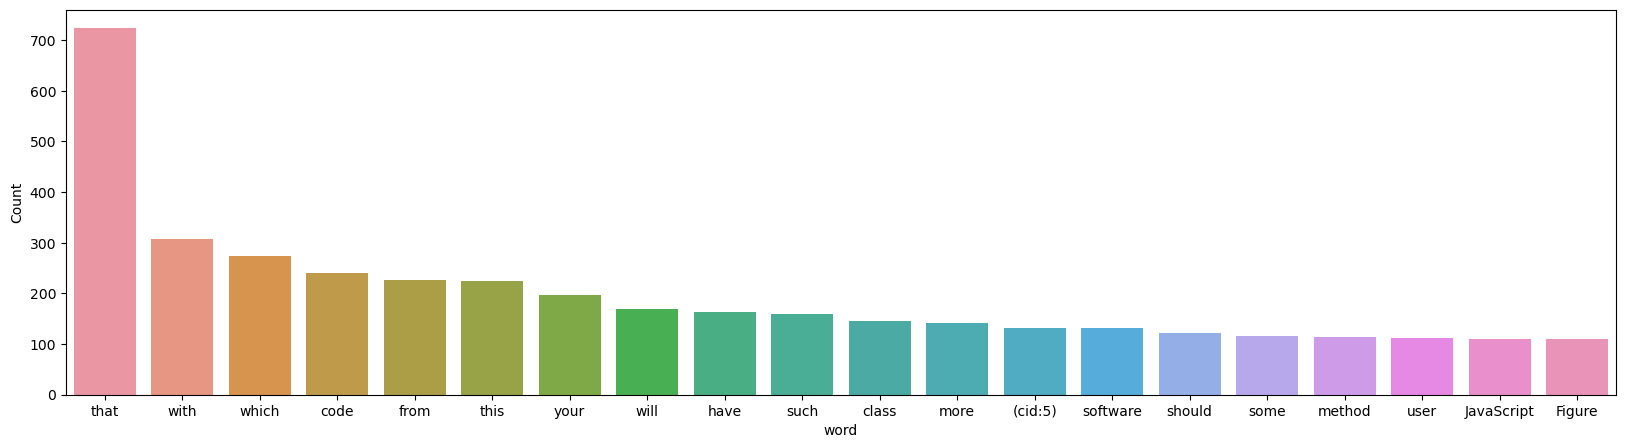

In [66]:
freq_words(textbook_DF[0])

In [71]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews)

0                                                                [engineering, software, service:, agile, approach, using, cloud, computing, second, edition,, 2.0b7, armandofoxanddavidpatterson, july8,2021]
1      [copyright2021byarmandofoxanddavidpatterson., youarefreetomakedigitalorprintedcopiesofthismaterialforyourownpersonaluse., youmaynotredistributethismaterialineitherdigitalorprintedform,whetherornot...
2      [about, authors, armandofox(pronouns:he,him,él)isaprofessorofcomputerscience,diversityandeq-, uityofficeratboththeeecsdepartmentlevelandcampuslevel,, andfacultyadvisorfor, digitallearningstrategya...
3                                                                                                                                                                                                           []
4      [this, beta, version, 2.0b7., there, three, “placeholders”, programming, assign-, ments, (chips—see, below), still, developed., associations, (chips, 5.7), cachingan

In [72]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[0]) # print lemmatized review

['engineering', 'software', 'service', 'agile', 'approach', 'computing', 'edition', 'july8,2021']


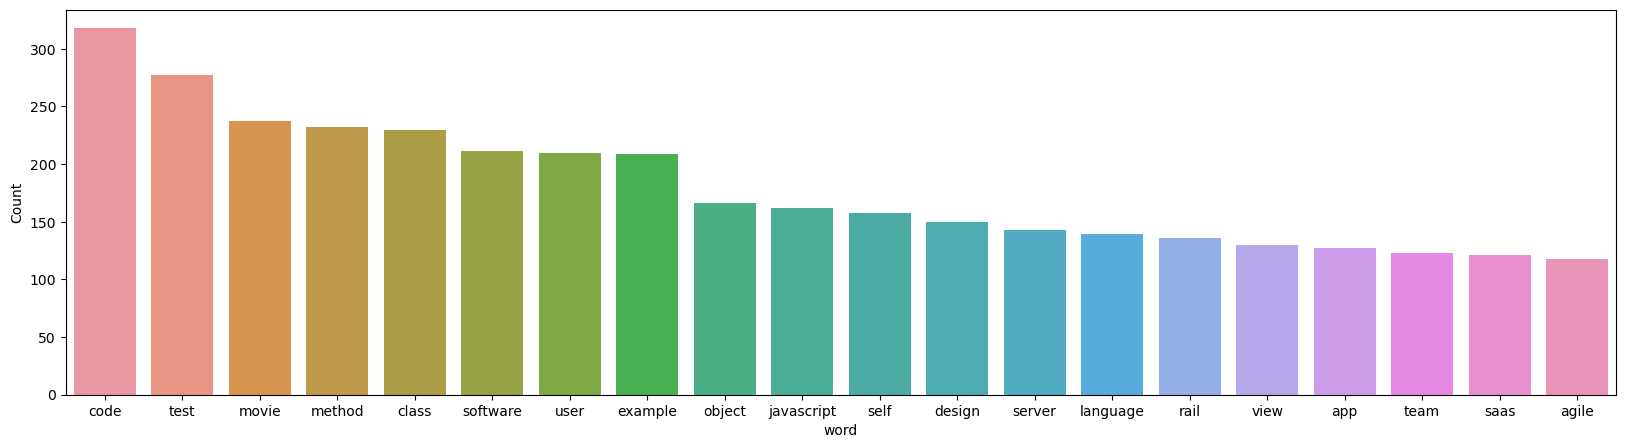

In [74]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

textbook_DF[0] = reviews_3

freq_words(textbook_DF[0], 20) 

In [75]:
dictionary = corpora.Dictionary(reviews_2) 
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=10, 
                random_state=100,
                chunksize=1000,
                passes=50)

In [76]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.067801 -0.081328       1        1  20.235680
8      0.031695  0.030911       2        1  14.375360
6     -0.046666 -0.148833       3        1  13.151663
7      0.047007  0.023650       4        1   8.491391
4     -0.107141 -0.004117       5        1   8.273369
3     -0.141703  0.058125       6        1   7.979463
0      0.019583  0.057234       7        1   7.960484
2      0.009214  0.035006       8        1   7.211526
9      0.081260  0.039850       9        1   6.803155
1      0.038951 -0.010498      10        1   5.517909, topic_info=            Term        Freq       Total Category  logprob  loglift
2372       movie  170.000000  170.000000  Default  30.0000  30.0000
129   javascript  119.000000  119.000000  Default  29.0000  29.0000
1061    function   84.000000   84.000000  Default  28.0000  28.0000
148         test  221.000000  221.000000  Default  27.0000  27.0000
185        class  177.000000  177.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
809       result    3.778872   27.589149  Topic10  -6.1287   0.9092
1376        page    4.398387   86.901638  Topic10  -5.9769  -0.0864
443         user    4.417074  159.150471  Topic10  -5.9727  -0.6872
451          app    4.180710   96.373981  Topic10  -6.0277  -0.2406
154      version    4.047478   61.185180  Topic10  -6.0601   0.1814

[755 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
466        1  0.145237        %
466        2  0.096825        %
466        3  0.048412        %
466        4  0.193649        %
466        5  0.048412        %
...      ...       ...      ...
9189       7  0.183157  zipcode
9189       9  0.549472  zipcode
6473       4  0.235300    zorro
6473       6  0.705900    zorro
10181      6  0.469355    |fan|

[1888 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 9, 7, 8, 5, 4, 1, 3, 10, 2])